In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [39]:
data = pd.read_csv('../DataSets/AusOpen-women-2013.csv')
dataset = data.fillna(0, inplace=True)
data
#dataset

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Serena Williams,Ashleigh Barty,1,1,2.0,0.0,59,20,41,8,...,0.0,0.0,2.0,4.0,31,2.0,1.0,0.0,0.0,0.0
1,Vesna Dolonc,Lara Arruabarrena,1,1,2.0,1.0,65,33,35,10,...,4.0,7.0,0.0,0.0,74,6.0,2.0,4.0,0.0,0.0
2,Pauline Parmentier,Karolina Pliskova,1,0,0.0,2.0,63,16,37,4,...,5.0,14.0,0.0,0.0,64,6.0,6.0,0.0,0.0,0.0
3,Heather Watson,Daniela Hantuchova,1,0,1.0,2.0,61,41,39,19,...,5.0,13.0,5.0,8.0,102,7.0,3.0,6.0,0.0,0.0
4,Samantha Stosur,Klara Zakopalova,1,1,2.0,0.0,65,28,35,11,...,4.0,14.0,10.0,15.0,60,3.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Simona Halep,Dominika Cibulkova,5,0,0.0,2.0,67,13,33,6,...,5.0,9.0,3.0,4.0,54,6.0,6.0,0.0,0.0,0.0
123,Agnieszka Radwanska,Victoria Azarenka,5,1,2.0,1.0,59,33,41,16,...,2.0,5.0,20.0,34.0,74,1.0,7.0,0.0,0.0,0.0
124,Eugenie Bouchard,Na Li,6,0,0.0,2.0,45,13,55,5,...,6.0,10.0,11.0,14.0,71,6.0,6.0,0.0,0.0,0.0
125,Dominika Cibulkova,Agnieszka Radwanska,6,1,2.0,0.0,64,22,36,10,...,1.0,9.0,4.0,9.0,40,1.0,2.0,0.0,0.0,0.0


In [42]:
X = data.iloc[:,3:42]  #independent columns od trece do poslednje kolone
y = data.iloc[:,4]     #target column 

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Specs       Score
15  TPW.1  361.416041
36  ST3.2  330.112508
33  TPW.2  309.847117
28  UFE.2  226.712907
4   FSW.1  174.387933
9   WNR.1  115.040725
22  FSW.2  113.896754
18  ST3.1   94.172228
11  BPC.1   90.542233
1    FNL1   87.019868


[0.19328656 0.27414094 0.15978096 0.00182346 0.01541045 0.00125175
 0.00549528 0.00355434 0.00108772 0.00425422 0.0042867  0.03637764
 0.00436466 0.00195237 0.00159965 0.02717466 0.00981527 0.0152991
 0.03731613 0.         0.         0.00168092 0.00747363 0.00249887
 0.0100652  0.00496911 0.00147986 0.00301347 0.00923833 0.00950436
 0.00832956 0.00199735 0.00253676 0.01196927 0.01929429 0.02254208
 0.08513508 0.         0.        ]


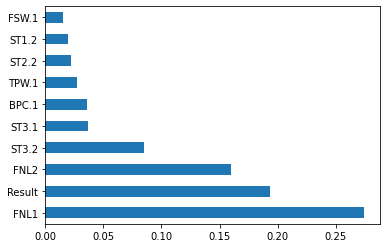

In [43]:
#Feature Importance
X = data.iloc[:,3:42]  #independent columns
y = data.iloc[:,4]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#Correlation Matrix with Heatmap

X = data.iloc[:,3:42]  #independent columns
y = data.iloc[:,4]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")